In [ ]:
!pip install -q nbconvert
!apt-get install -q texlive-xetex texlive-fonts-recommended texlive-plain-generic

# **Introdução** 

Grupo: Germano Barcelos (3873), Guilherme Melos (3882), Jhonata Miranda (3859)

O reconhecimento de imagens e o processamento digital de seus padrões requer a aplicação de operações básicas, que são os blocos construtores do estado da arte. Neste relatório, serão introduzidos e explorados em prática os conceitos transformações geométricas, como rotação e translação, filtragem de banda e algumas manipulações básicas de imagem utilizando as bibliotecas _OpenCV_, _MatplotLib_ e _Numpy_.

# **Desenvolvimento**

Nesse relatório será descrito como utilizar funções e procedimentos básicos do processamento digital de imagens, como: mostrar e modificar um canal da imagem, alterando sua cor; rotações, bem como, a utilização da webcam para gravar um vídeo.

## Imports
Para utilizar os recursos que utilizaremos para modificar e extrair dados das imagens, é necessário importar as bibliotecas OpenCV, Numpy e MatPlotLib. 

Nesse caso, é necessário utilizar o matplotlib para mostrar as imagens, porque não há suporte da função `cv2.imshow()` para o jupyter notebook, por não existir suporte ao servidor gráfico _X Server_. Para o google colab, existe a possibilidade de usar uma outra função conforme a seguir: `from google.colab.patches import cv2_imshow`; caso queira utilizar essa última alternativa é necessário implementar a função `show_img` de tal modo que possibilita o uso do `cv2_imshow`.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Já para mostrar as imagens, plotando-as no notebook, precisamos definir a função show_img que plota as imagens normalmente e em escala de cinza:

A função abaixo nomeada de `show_img` tem como objetivo a generalização de mostrar imagens de acordo com sua assinatura `show_img(titulo, img, cmap=None)`.  O primeiro parâmetro tem relação ao título da figura, ou seja, quando a imagem for mostrada, utilizando a biblioteca `matplotlib`, o título será igual a `titulo` (é esperado que seja uma cadeia de caracteres). O segundo parâmetro dessa função recebe um array de $n$ dimensões, as quais representam os canais das imagens. O `cmap` é um parâmetro que define qual mapeamento de cores vai ser utilizado.

In [ ]:
def show_img(titulo, img, cmap=None):
    if cmap is not None:
        plt.imshow(img, cmap=cmap)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.title(titulo)
    plt.axis("off")
    plt.show()

Abaixo temos a imagem `cores.png`, que será utilizada nos próximos processamentos. A função `cv2.imread(caminho_da_imagem)` é usada para ler uma imagem de umdeterminado caminho, com o intuito de transformar o arquivo em uma representação de array. Nesse caso, a variável `img` será um array de 3 dimensões.


É possível observar que a imagem é composta (aproximadamente) de 4 cores diferentes, (0,0,0) ou preto, (255, 0, 0) ou vermelho, (0, 255, 0) ou verde, (0, 0, 255) ou azul. O preto preenche a maior parte da imagem, as outras cores, apenas destacam as palavras respectivas ao nome da cor.

## Cores

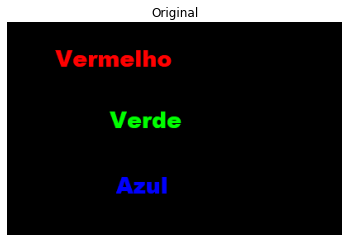

In [ ]:
img = cv2.imread("cores.png")
show_img("Original", img)

Nesse primeiro processamento, utilizamos a função `cv2.split(img)`, para dividir o array de 3 dimensões em 3 arrays de somente 1 dimensão. Nesse caso, cada variável que recebe o retorno dessa função representará 1 canal da imagem. Utilizando a biblioteca _OpenCV_, o padrão de ordem dos canais é BGR, ou seja, Blue, Green e Red, logo a variável `b` recebe o array do canal da cor azul, e assim, respectivamente. Para exibir essa imagem, note que é preciso converter o mapa de cor de BGR para RGB.

Linhas seguintes cria um array de 2 dimensões que possui somente um canal, assim, é preciso utilizar o colormap de 1 canal, nesse caso, foi utilizado o _gray_.

É notável que, a imagem aumenta de dimensão pois adicionamos as bandas de forma adjacente, ou seja, o azul tem os limites $[:max_x, :max_y]$, o verde: $[:max_x, y:max_y*2]$ e o vermelho: $[:max_x, max_y*3]$.

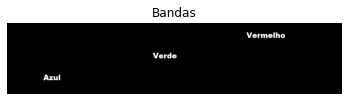

In [ ]:
b, g, r = cv2.split(img)

lin, col, dim = img.shape

img3 = np.zeros([lin, col*3, ])
img3[0:lin, 0:col] = b
img3[0:lin, col:2*col] = g
img3[0:lin, 2*col:3*col] = r

show_img("Bandas", img3, cmap='gray')

Após isso, unimos novamente a imagem utilizando o merge e a mostramos com os 3 canais, em RGB. 

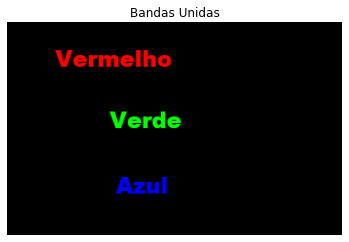

In [ ]:
img_merged = cv2.merge([b,g,r])
show_img("Bandas Unidas", img_merged)

Nesse caso, alteramos o colormap da imagem de BGR para Gray. Agora, essa imagem possui apenas 1 banda e é necessário para mostrá-la um colormap que condiz com o número de canais, que nesse caso, será o gray.

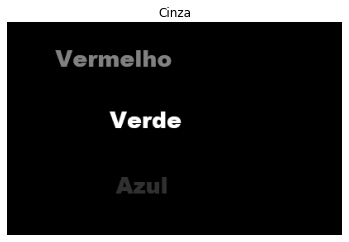

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img("Cinza", gray, cmap='gray')

## Ayrton Senna

Agora vamos trabalhar com a imagem ayrton-senna.jpg:

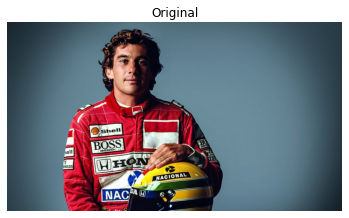

In [ ]:
img = cv2.imread("ayrton-senna.jpg")
show_img("Original", img)

Utilizando o flip, e definindo a orientação como 1, giramos a imagem de maneira horizontal, fazendo ela possuir um aspecto espelhado:

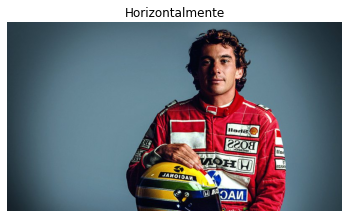

In [ ]:
flipped = cv2.flip(img, 1)
show_img("Horizontalmente", flipped)

Quando definimos a orientação como -1, viramos vertical e horizontalmente ao mesmo tempo:

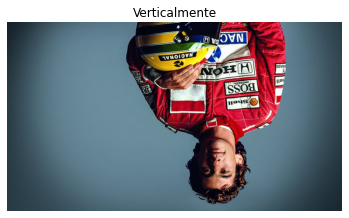

In [ ]:
flipped = cv2.flip(img, -1)
show_img("Verticalmente", flipped)

Já utilizando o rotate, com o ROTATE_90_CLOCKWISE, giramos a imagem 90 graus em sentido horário:

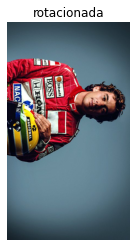

In [ ]:
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
show_img("rotacionada", img_rot)

Para girar a imagem 45 graus, salvamos as coordenadas do centro da imagem em cX e cY, utilizamos o `getRotationMatrix2D` para aplicar uma rotação matricial e o `warpAffine` para aplicá-la na imagem:

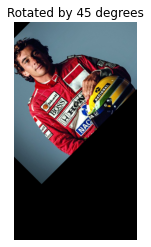

In [ ]:
lin, col, dim = img.shape
(cX, cY) = (lin//2, col//2)
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(img, M, (lin, col))
show_img("Rotated by 45 degrees", rotated)

## Halteres

Exibimos os dados da imagem, como tipo, tamanho em pixels e a quantidade de linhas e colunas. Após isso, percorremos a imagem pixel a pixel e se: o pixel da faixa de cor azul estiver entre 110 e 225, o pixel da faixa de cor verde estiver entre 80 e 120 e o pixel da faixa de cor vermelho estiver entre 30 e 80, maximizamos o azul e zeramos os outros, para localizar onde tem mais tons azuis. Se as condições acima não forem correspondidas, deixamos o pixel totalmente preto. Por fim, concatenamos a imagem original com a alterada usando o `hconcat` e exibimos:

Tipo da Imagem: uint8
Tamanho em pixels da imagem: 202500
linha = 300, col = 225


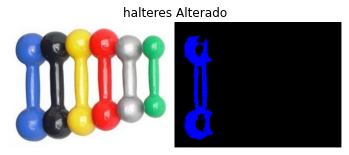

In [ ]:
img = cv2.imread('halteres.jpg')
[col, lin, dim] = img.shape
img2 = img.copy()
print(f"Tipo da Imagem: {img.dtype}")
print(f"Tamanho em pixels da imagem: {img.size}")
print(f"linha = {lin}, col = {col}")
for j in range(0, col-1):
    for i in range(0, lin-1):
        (b, g, r) = img[j, i]
        if (b>110 and b<255) and (g>80 and g<120) and (r>30 and r<80):
            b=255; g=0; r=0
            img2[j,i,] = np.array([b,g,r])
        else:
            img2[j,i,] = np.array([0,0,0])
img = cv2.hconcat([img, img2])
show_img("halteres Alterado", img)

## Câmera

Por fim, utilizamos os recursos `VideoCapture`, `VideoWriter` e `read` para ler a webcam principal e escrever um vídeo de saida. Utilizando a `cvtColor`, convertemos as cores de cada frame para cinza, utilizando o `COLOR_BGR2GRAY`, assim os frames gravados pela webcam ficaraão em escala cinza.

Na função `cv2.VideoWriter(caminho_saida, video_format, taxa_de_frames, dimensao)`, o parâmetro de `video_format` define o formato do vídeo. Nesse caso, será o MJPG (Motion JPG), que compacta o vídeo em frames JPG.

In [ ]:
camera = cv2.VideoCapture(0)
outputFile = 'cinza.avi'
(sucesso, frame) = camera.read()
vid_writer = cv2.VideoWriter(outputFile, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 60, (frame.shape[1], frame.shape[0]))
numero=1

while True:
    (sucesso, frame) = camera.read()
    if not sucesso:
        break
    # cv2.imwrite(f'resources/nome{str(numero)}.jpg', frame)
    # numero += 1   

    # lab = cv2.cvtColor(frame, cv2.COLOR_RGB2Lab)
    # vid_writer.write((lab).astype(np.uint8))

    frame_pb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow("Exibindo video", frame_pb)
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break
vid_writer.release()
cv2.destroyAllWindows()

# **Conclusão**

Dessa maneira, utilizando as bibliotecas já mencionadas, conseguimos aplicar diversas modificações as imagens e ao vídeo. Também foi possivel extrair informações dos mesmos e utilizá-las em conjunto com as modificações para obter os efeitos desejados.

In [3]:
!jupyter nbconvert --to pdf main-relatorio.ipynb

[NbConvertApp] Converting notebook main-relatorio.ipynb to pdf
[NbConvertApp] Support files will be in main-relatorio_files/
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Making directory ./main-relatorio_files
[NbConvertApp] Writing 42231 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertA